In [1]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git

fatal: destination path 'Neural-Style-Transfer' already exists and is not an empty directory.


In [2]:
dir_path = "Neural-Style-Transfer"

# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [3]:
NETWORK = 'INetwork' + '.py'

In [4]:
# List all the arguments that can be supplied to Network.py
!python3 {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

In [5]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0


# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [6]:
import os

#Set relative directory for content images
content_image_dir = os.path.join(dir_path,'images','inputs','content')

#List of available images
content_list = os.listdir(content_image_dir)

In [7]:
content_list

['blue-moon-lake.jpg',
 'Kinkaku-ji.jpg',
 'ancient_city.jpg',
 'Sunlit Mountains.jpg',
 'golden_gate.jpg',
 'Aurea-Luna.jpg',
 'tubingen.jpg',
 'sagano_bamboo_forest.jpg',
 'Dawn Sky.jpg',
 'Dipping-Sun.jpg',
 'winter-wolf.jpg',
 'Japanese-cherry-widescreen-wallpaper-Picture-1366x768.jpg']

In [8]:
#Select image file from content directory
content_img = 'golden_gate.jpg'
content_img

'golden_gate.jpg'

In [9]:
#Ensures all spaces are removed as required by the script

CONTENT_IMAGE_FN_temp = content_img.strip().replace(" ", "_")

if content_img != CONTENT_IMAGE_FN_temp:
  os.rename(os.path.join(content_image_dir, content_img), os.path.join(content_image_dir,CONTENT_IMAGE_FN_temp))
  CONTENT_IMAGE_FN = os.path.join(content_image_dir,CONTENT_IMAGE_FN_temp)
else:
    CONTENT_IMAGE_FN = os.path.join(content_image_dir,content_img)
        
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : Neural-Style-Transfer/images/inputs/content/golden_gate.jpg


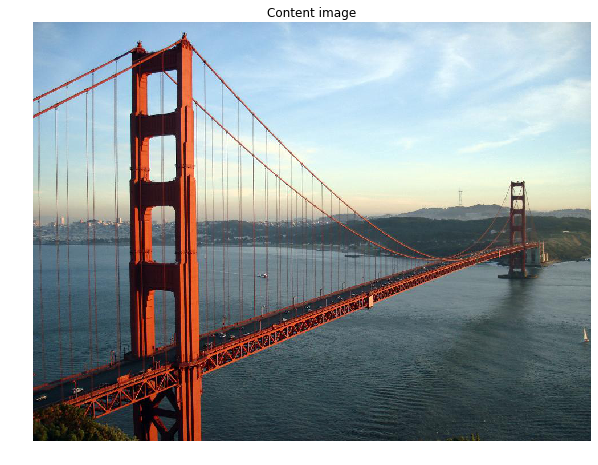

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [11]:
#Set relative directory for content images
style_image_dir = os.path.join(dir_path,'images','inputs','style')

#List of available images
style_list = os.listdir(style_image_dir)

In [12]:
style_list

['metals',
 'seated-nude.jpg',
 'japanese_flower_sakai_hoitsu.jpg',
 'bamboo_forest.jpg',
 'water-lilies-1919-2.jpg',
 'woman-with-hat-matisse.jpg',
 'starry_night_crop.png',
 'escher_sphere.jpg',
 'japanese_painting.jpg',
 'the_scream.jpg',
 'Blue Strokes.jpg',
 'shipwreck.jpg',
 'misty-mood-leonid-afremov.jpg',
 'frida_kahlo.jpg',
 'red-canna.jpg',
 'starry_night.jpg',
 'wave_kanagawa.jpg',
 'blue_swirls.jpg',
 'picasso_selfport1907.jpg',
 'candy-style.jpg',
 'patterned_leaves.jpg']

In [13]:
#Select image file from content directory
style_img = 'starry_night.jpg'
style_img

'starry_night.jpg'

In [14]:
#Ensures all spaces are removed as required by the script

STYLE_IMAGE_FN_temp = style_img.strip().replace(" ", "_")

if style_img != STYLE_IMAGE_FN_temp:
  os.rename(os.path.join(style_image_dir, style_img), os.path.join(style_image_dir,STYLE_IMAGE_FN_temp))
  STYLE_IMAGE_FN = os.path.join(style_image_dir,STYLE_IMAGE_FN_temp)
else:
    STYLE_IMAGE_FN = os.path.join(style_image_dir,style_img)
        
  
print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : Neural-Style-Transfer/images/inputs/style/starry_night.jpg


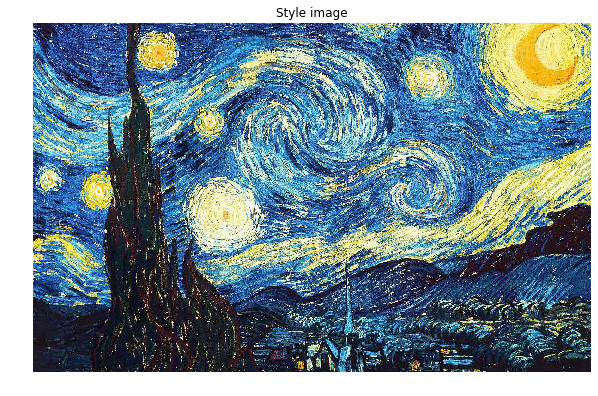

In [15]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# Generate Image

Run the below cells to generate the image

In [16]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [17]:
#changed from python to python3
!python3 {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-06-08 12:07:23.614419: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2019-06-08 12:07:23.614796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1531] Found device 0 with properties: 
name: Vega 10 XTX [Radeon Vega Frontier Edition]
AMDGPU ISA: gfx900
memoryClockRate (GHz) 1.6
pciBusID 0000:03:00.0
Total memory: 15.98GiB
Free memory: 15.73GiB
2019-06-08 12:07:23.614820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1642] Adding visible gpu devices: 0
2019-06-08 12:07:23.614832: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1053] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-06-08 12:07:23.614839: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1059]      0 
2019-06-08 12:07:23.614845: I tensorflow/core/common_runtime/gpu/gpu_devic

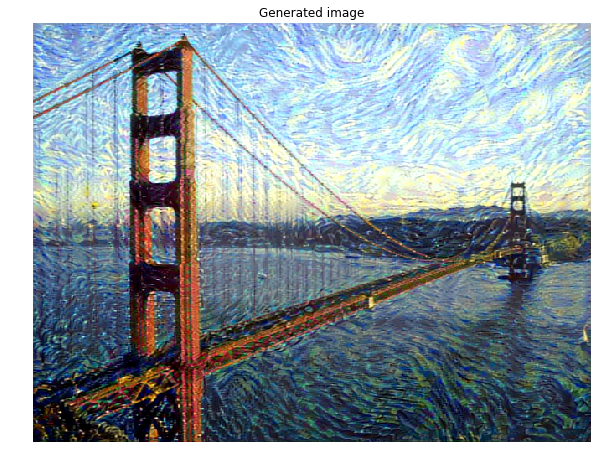

In [18]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

# (Optional) Color Transfer

If you wish for color transfer between the content image and the generated image, then run the next cell, else skip to "Download Generated Image" section

In [19]:
COLOR_TRANSFER = 'color_transfer.py'
COLOR_FINAL_IMAGE_PATH = FINAL_IMAGE_PATH[:-4] + '_%s_color.png'

# Optional - Use Histogram matching (0 for no, 1 for yes)
HISTOGRAM_MATCH = 0

if HISTOGRAM_MATCH == 0:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('original')
else:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('histogram')
  
#Changed python to python3
!python3 {dir_path}/{COLOR_TRANSFER} {CONTENT_IMAGE_FN} {FINAL_IMAGE_PATH} --hist_match {HISTOGRAM_MATCH}


Image saved at path : generated/gen_at_iteration_10_original_color.png


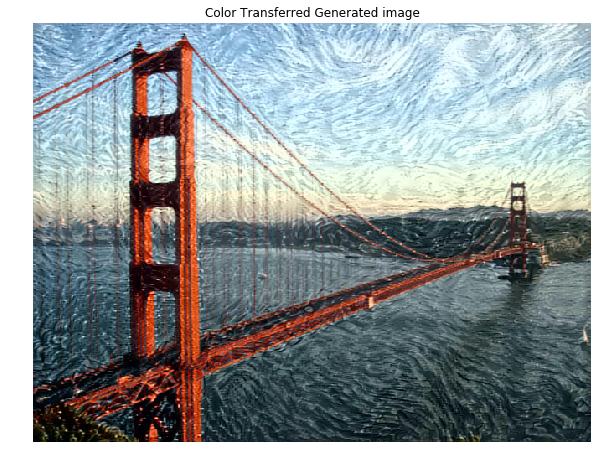

In [20]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(COLOR_FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Color Transferred Generated image')
plt.imshow(img)

# Download Color Transfered Image

Run the following cell to download the color transferred result

In [21]:
# download the color transfered image
# files.download(COLOR_FINAL_IMAGE_PATH)

# Download Generated Image

Run the following cell to download the final result

In [22]:
#files.download(FINAL_IMAGE_PATH)